## Mori Model

(2.1) from Hughes et al. 2024

$\frac{\partial u}{\partial t}=(b+\gamma\frac{u^n}{1+u^n})v-Iu+D\frac{\partial^2u}{\partial x^2}$

$\frac{\partial v}{\partial t}=-(b+\gamma\frac{u^n}{1+u^n})v+Iu+\frac{\partial^2v}{\partial x^2}$

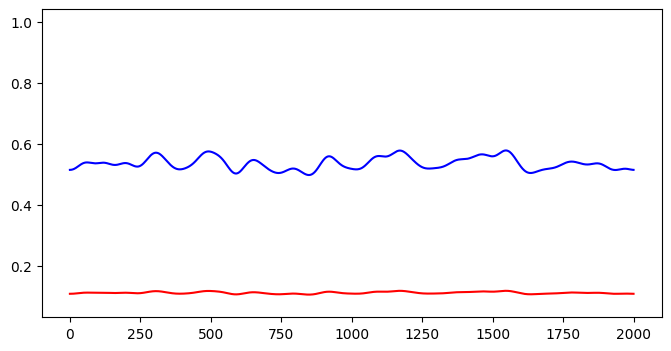

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from pde_utils import periodic_laplacian_1D as laplacian

# define parameters
b = 4 # GTPase basal rate of activation
I = 1 # GTPase inactivation rate
gamma = 3.557 # GTPase autocatalytic activation rate
D = 0.1 # Active GTPase rate of diffusion
n = 2

size = 2000 # number of cells
dt = 0.01  # time step
t = 2000.0 # run time
frame_int = 25 # animation frame interval

# set initial concentrations
U = 0.1+0.9*np.random.rand(size) # active GTPase
V = np.full(size, 0.1) # inactive GTPase

# set up figure
fig, ax = plt.subplots(figsize=(8, 4))
frames = []

# simulate the PDE with finite difference method
for i in range(int(t/dt)):

    # update concentrations
    U = U + dt * ((b + gamma * U**n / (1 + U**n)) * V - I * U + D * laplacian(U))
    V = V + dt * (-(b + gamma * U**n / (1 + U**n)) * V + I * U + laplacian(V))

    # capture a frame every frame_int seconds
    if i % int(frame_int/dt) == 0:
        Uline, = ax.plot(U, color='blue')
        Vline, = ax.plot(V, color='red')
        frames.append([Uline, Vline])

# save animation
animation.ArtistAnimation(fig, frames, interval=50, blit=True).save('animations/mori.gif', writer=PillowWriter(fps=10))